<a href="https://colab.research.google.com/github/cuonghip0908/AssignmentCNN/blob/master/AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/AI_COLAB/Lab8AutoEncoder

/content/drive/My Drive/AI_COLAB/Lab8AutoEncoder


Denoise Cifar 10

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10

Using TensorFlow backend.


In [ ]:
#load du lieu 
(x_train,y_train),(x_test,y_test)=cifar10.load_data()


In [ ]:
#normalization
X_train=x_train/255.
X_test=x_test/255.
print(X_train.shape)
print(X_test.shape)


(50000, 32, 32, 3)
(10000, 32, 32, 3)


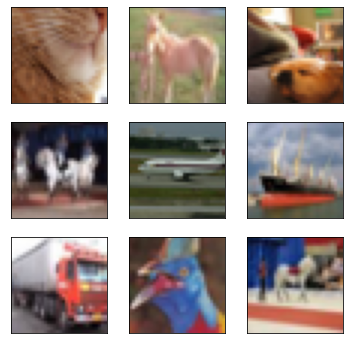

In [ ]:
#visualize 
plt.figure(figsize=(6,6))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[i])
  plt.xticks([])
  plt.yticks([])
plt.show()

In [ ]:
#split 
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_val.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
def add_noise(x,noise=0.2):
  x=x+np.random.randn(*x.shape)*noise
  x=x.clip(0.,1.)
  return x
X_train_noisy=add_noise(X_train)
X_val_noisy=add_noise(X_val)
X_test_noisy=add_noise(X_test)

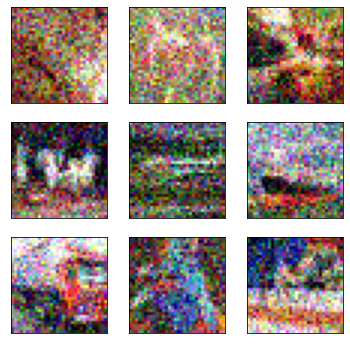

In [ ]:
#visualize
plt.figure(figsize=(6,6))
for i in range (9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train_noisy[i])
  plt.xticks([])
  plt.yticks([])
plt.show()

In [ ]:
from tensorflow.keras.layers import Input,Dense,Conv2D,MaxPooling2D,UpSampling2D
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
def make_convolution_autoencoder():
  #encoding
  inputs=Input(shape=(32,32,3))
  x=Conv2D(32,3,activation='relu',padding='same')(inputs)
  x=MaxPooling2D()(x)
  x=Conv2D(32,3,activation='relu',padding='same')(x)
  x=MaxPooling2D()(x)
  x=Conv2D(64,3,activation='relu',padding='same')(x)
  encoded=MaxPooling2D()(x)

  #decoding
  x=Conv2D(64,3,activation='relu',padding='same')(encoded)
  x=UpSampling2D()(x)
  x=Conv2D(32,3,activation='relu',padding='same')(x)
  x=UpSampling2D()(x)
  x=Conv2D(32,3,activation='relu',padding='same')(x)
  x=UpSampling2D()(x)
  decoded=Conv2D(3,3,activation='sigmoid',padding='same')(x)

  #autoencoder
  autoencoder=Model(inputs,decoded)
  autoencoder.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
  return autoencoder

In [ ]:
autoencoder=make_convolution_autoencoder()
autoencoder.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 4, 4, 64)          0   

In [ ]:
H=autoencoder.fit(X_train_noisy,X_train,validation_data=(X_val_noisy,X_val),batch_size=128,epochs=10,verbose=1)

Epoch 1/10
313/313 [==============================] - 8s 24ms/step - loss: 0.0208 - accuracy: 0.5964 - val_loss: 0.0135 - val_accuracy: 0.6497
Epoch 2/10
313/313 [==============================] - 7s 23ms/step - loss: 0.0126 - accuracy: 0.6840 - val_loss: 0.0123 - val_accuracy: 0.6854
Epoch 3/10
313/313 [==============================] - 7s 23ms/step - loss: 0.0115 - accuracy: 0.6985 - val_loss: 0.0113 - val_accuracy: 0.7106
Epoch 4/10
313/313 [==============================] - 7s 23ms/step - loss: 0.0109 - accuracy: 0.7055 - val_loss: 0.0106 - val_accuracy: 0.7127
Epoch 5/10
313/313 [==============================] - 7s 23ms/step - loss: 0.0105 - accuracy: 0.7095 - val_loss: 0.0100 - val_accuracy: 0.7182
Epoch 6/10
313/313 [==============================] - 7s 23ms/step - loss: 0.0100 - accuracy: 0.7125 - val_loss: 0.0097 - val_accuracy: 0.7092
Epoch 7/10
313/313 [==============================] - 7s 23ms/step - loss: 0.0096 - accuracy: 0.7142 - val_loss: 0.0095 - val_accuracy: 0.7245

In [ ]:
score=autoencoder.evaluate(X_test_noisy,X_test,verbose=0)
print(score)

[0.0085431057959795, 0.7054204940795898]


In [ ]:
X_test_decoded=autoencoder.predict(X_test_noisy)

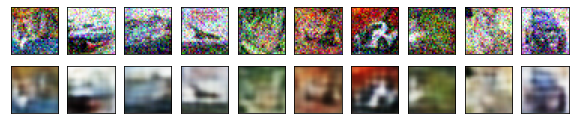

In [ ]:
#visualize
plt.figure(figsize=(10,2))
for i in range (10):
  plt.subplot(2,10,i+1)
  plt.imshow(X_test_noisy[i])
  plt.xticks([])
  plt.yticks([])

  plt.subplot(2,10,i+11)
  plt.imshow(X_test_decoded[i])
  plt.xticks([])
  plt.yticks([])
plt.show()